In [18]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib
import matplotlib.pylab as plt
matplotlib.style.use("ggplot")
from sklearn import datasets
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:
# irisデータセット
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris["data"], iris["target"]], columns= iris["feature_names"] + ["target"])
print(len(data))
display(data.head())

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


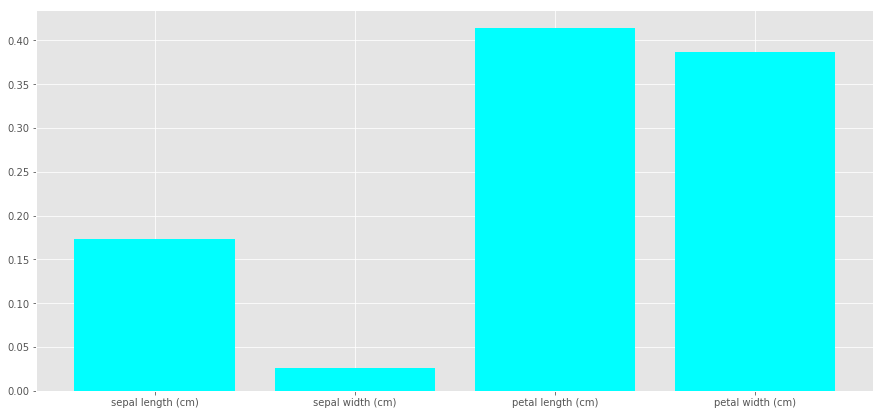

変数重要度:  [ 0.17381678  0.02615388  0.4136363   0.38639304]
混合行列: 
[[50  0  0]
 [ 0 50  1]
 [ 0  0 49]]
教師データ正解率:  0.993333333333


In [25]:
# ランダムフォレストで変数重要度と予測精度を確認してみる

t = data["target"]
x_label = iris["feature_names"] # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x = data[x_label]
model = RandomForestClassifier()
model.fit(x, t) # モデルフィッティング
# 変数重要度プロット
left = list(range(1, len(x_label)+1))
height = model.feature_importances_
plt.figure(figsize=(15,7))
plt.bar(left, height, tick_label=x_label, color="cyan")
plt.show()
print("変数重要度: ", model.feature_importances_) # 変数重要度
y = model.predict(x)
print("混合行列: ")
print(confusion_matrix(y, t)) # 混合行列
print("教師データ正解率: ", accuracy_score(y, t)) # 正解率